<a href="https://colab.research.google.com/github/TanviDeore/newsClassifiermodel/blob/main/NewsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade --force-reinstall --no-deps kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.2
    Uninstalling kaggle-1.7.4.2:
      Successfully uninstalled kaggle-1.7.4.2


In [3]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 2.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
import matplotlib.pyplot as plt


In [5]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"tanvideore","key":"f925c13a9a8e6a4489a9243c898ad727"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download rmisra/news-category-dataset

Dataset URL: https://www.kaggle.com/datasets/rmisra/news-category-dataset
License(s): Attribution 4.0 International (CC BY 4.0)


In [7]:
from zipfile import ZipFile

In [8]:
file_name = "news-category-dataset.zip"

In [9]:
with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done!')

Done!


In [3]:
import pandas as pd
from pathlib import Path
import json
import shutil

In [11]:
df = pd.read_json('/content/News_Category_Dataset_v3.json',lines=True)
df

link  \
0       https://www.huffpost.com/entry/covid-boosters-...   
1       https://www.huffpost.com/entry/american-airlin...   
2       https://www.huffpost.com/entry/funniest-tweets...   
3       https://www.huffpost.com/entry/funniest-parent...   
4       https://www.huffpost.com/entry/amy-cooper-lose...   
...                                                   ...   
209522  https://www.huffingtonpost.com/entry/rim-ceo-t...   
209523  https://www.huffingtonpost.com/entry/maria-sha...   
209524  https://www.huffingtonpost.com/entry/super-bow...   
209525  https://www.huffingtonpost.com/entry/aldon-smi...   
209526  https://www.huffingtonpost.com/entry/dwight-ho...   

                                                 headline   category  \
0       Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1       American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2       23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3       The Funniest Tweets From Parents This Week (Se...  PARENTING   
4       Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   
...                                                   ...        ...   
209522  RIM CEO Thorsten Heins' 'Significant' Plans Fo...       TECH   
209523  Maria Sharapova Stunned By Victoria Azarenka I...     SPORTS   
209524  Giants Over Patriots, Jets Over Colts Among  M...     SPORTS   
209525  Aldon Smith Arrested: 49ers Linebacker Busted ...     SPORTS   
209526  Dwight Howard Rips Teammates After Magic Loss ...     SPORTS   

                                        short_description  \
0       Health experts said it is too early to predict...   
1       He was subdued by passengers and crew when he ...   
2       "Until you have a dog you don't understand wha...   
3       "Accidentally put grown-up toothpaste on my to...   
4       Amy Cooper accused investment firm Franklin Te...   
...                                                   ...   
209522  Verizon Wireless and AT&T are already promotin...   
209523  Afterward, Azarenka, more effusive with the pr...   
209524  Leading up to Super Bowl XLVI, the most talked...   
209525  CORRECTION: An earlier version of this story i...   
209526  The five-time all-star center tore into his te...   

                     authors       date  
0       Carla K. Johnson, AP 2022-09-23  
1             Mary Papenfuss 2022-09-23  
2              Elyse Wanshel 2022-09-23  
3           Caroline Bologna 2022-09-23  
4             Nina Golgowski 2022-09-22  
...                      ...        ...  
209522      Reuters, Reuters 2012-01-28  
209523                       2012-01-28  
209524                       2012-01-28  
209525                       2012-01-28  
209526                       2012-01-28  

[209527 rows x 6 columns]

In [12]:
# reading the json file
with open('/content/News_Category_Dataset_v3.json') as f:
    data = [json.loads(line) for line in f]



In [13]:
# creating the dataframe
dataframe = pd.json_normalize(data)

# converted a file to csv
df.to_csv('news_classification.csv', encoding='utf-8', index=False)

In [14]:
pd.read_csv('/content/news_classification.csv')

link  \
0       https://www.huffpost.com/entry/covid-boosters-...   
1       https://www.huffpost.com/entry/american-airlin...   
2       https://www.huffpost.com/entry/funniest-tweets...   
3       https://www.huffpost.com/entry/funniest-parent...   
4       https://www.huffpost.com/entry/amy-cooper-lose...   
...                                                   ...   
209522  https://www.huffingtonpost.com/entry/rim-ceo-t...   
209523  https://www.huffingtonpost.com/entry/maria-sha...   
209524  https://www.huffingtonpost.com/entry/super-bow...   
209525  https://www.huffingtonpost.com/entry/aldon-smi...   
209526  https://www.huffingtonpost.com/entry/dwight-ho...   

                                                 headline   category  \
0       Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1       American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2       23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3       The Funniest Tweets From Parents This Week (Se...  PARENTING   
4       Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   
...                                                   ...        ...   
209522  RIM CEO Thorsten Heins' 'Significant' Plans Fo...       TECH   
209523  Maria Sharapova Stunned By Victoria Azarenka I...     SPORTS   
209524  Giants Over Patriots, Jets Over Colts Among  M...     SPORTS   
209525  Aldon Smith Arrested: 49ers Linebacker Busted ...     SPORTS   
209526  Dwight Howard Rips Teammates After Magic Loss ...     SPORTS   

                                        short_description  \
0       Health experts said it is too early to predict...   
1       He was subdued by passengers and crew when he ...   
2       "Until you have a dog you don't understand wha...   
3       "Accidentally put grown-up toothpaste on my to...   
4       Amy Cooper accused investment firm Franklin Te...   
...                                                   ...   
209522  Verizon Wireless and AT&T are already promotin...   
209523  Afterward, Azarenka, more effusive with the pr...   
209524  Leading up to Super Bowl XLVI, the most talked...   
209525  CORRECTION: An earlier version of this story i...   
209526  The five-time all-star center tore into his te...   

                     authors        date  
0       Carla K. Johnson, AP  2022-09-23  
1             Mary Papenfuss  2022-09-23  
2              Elyse Wanshel  2022-09-23  
3           Caroline Bologna  2022-09-23  
4             Nina Golgowski  2022-09-22  
...                      ...         ...  
209522      Reuters, Reuters  2012-01-28  
209523                   NaN  2012-01-28  
209524                   NaN  2012-01-28  
209525                   NaN  2012-01-28  
209526                   NaN  2012-01-28  

[209527 rows x 6 columns]

In [15]:
df.to_csv('news_classification_model.csv', encoding='utf-8', index=False)

In [16]:
df.shape

(209527, 6)

In [17]:
df.isna().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [18]:
df.head(10)

link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   
5  https://www.huffpost.com/entry/belk-worker-fou...   
6  https://www.huffpost.com/entry/reporter-gets-a...   
7  https://www.huffpost.com/entry/puerto-rico-wat...   
8  https://www.huffpost.com/entry/mija-documentar...   
9  https://www.huffpost.com/entry/biden-un-russia...   

                                            headline        category  \
0  Over 4 Million Americans Roll Up Sleeves For O...       U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...       U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...          COMEDY   
3  The Funniest Tweets From Parents This Week (Se...       PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...       U.S. NEWS   
5  Cleaner Was Dead In Belk Bathroom For 4 Days B...       U.S. NEWS   
6  Reporter Gets Adorable Surprise From Her Boyfr...       U.S. NEWS   
7  Puerto Ricans Desperate For Water After Hurric...      WORLD NEWS   
8  How A New Documentary Captures The Complexity ...  CULTURE & ARTS   
9  Biden At UN To Call Russian War An Affront To ...      WORLD NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog you don't understand wha...         Elyse Wanshel   
3  "Accidentally put grown-up toothpaste on my to...      Caroline Bologna   
4  Amy Cooper accused investment firm Franklin Te...        Nina Golgowski   
5  The 63-year-old woman was seen working at the ...                         
6  "Who's that behind you?" an anchor for New Yor...         Elyse Wanshel   
7  More than half a million people remained witho...       DÁNICA COTO, AP   
8  In "Mija," director Isabel Castro combined mus...           Marina Fang   
9  White House officials say the crux of the pres...     Aamer Madhani, AP   

        date  
0 2022-09-23  
1 2022-09-23  
2 2022-09-23  
3 2022-09-23  
4 2022-09-22  
5 2022-09-22  
6 2022-09-22  
7 2022-09-22  
8 2022-09-22  
9 2022-09-21

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**DIRECT SAVED DATA**

In [ ]:
'''
import pandas as pd
path = '/content/drive/MyDrive/Colab Notebooks/news_final.csv'
df = pd.read_csv(path)
df.drop(['text'],axis =1)
'''

"\nimport pandas as pd\npath = '/content/drive/MyDrive/Colab Notebooks/news_final.csv'\ndf = pd.read_csv(path)\ndf.drop(['text'],axis =1)\n"

In [ ]:

# import pandas as pd
# path  = '/content/drive/MyDrive/Colab Notebooks/news_40k'
# df = pd.read_csv(path)


In [20]:

shutil.copy('news_classification.csv','/content/drive/MyDrive/Colab Notebooks/news_classification.csv')

'/content/drive/MyDrive/Colab Notebooks/news_classification.csv'

In [21]:
df['text'] = df[['headline','short_description']].agg(' '.join, axis=1)

In [22]:
df.head(10)

link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   
5  https://www.huffpost.com/entry/belk-worker-fou...   
6  https://www.huffpost.com/entry/reporter-gets-a...   
7  https://www.huffpost.com/entry/puerto-rico-wat...   
8  https://www.huffpost.com/entry/mija-documentar...   
9  https://www.huffpost.com/entry/biden-un-russia...   

                                            headline        category  \
0  Over 4 Million Americans Roll Up Sleeves For O...       U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...       U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...          COMEDY   
3  The Funniest Tweets From Parents This Week (Se...       PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...       U.S. NEWS   
5  Cleaner Was Dead In Belk Bathroom For 4 Days B...       U.S. NEWS   
6  Reporter Gets Adorable Surprise From Her Boyfr...       U.S. NEWS   
7  Puerto Ricans Desperate For Water After Hurric...      WORLD NEWS   
8  How A New Documentary Captures The Complexity ...  CULTURE & ARTS   
9  Biden At UN To Call Russian War An Affront To ...      WORLD NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog you don't understand wha...         Elyse Wanshel   
3  "Accidentally put grown-up toothpaste on my to...      Caroline Bologna   
4  Amy Cooper accused investment firm Franklin Te...        Nina Golgowski   
5  The 63-year-old woman was seen working at the ...                         
6  "Who's that behind you?" an anchor for New Yor...         Elyse Wanshel   
7  More than half a million people remained witho...       DÁNICA COTO, AP   
8  In "Mija," director Isabel Castro combined mus...           Marina Fang   
9  White House officials say the crux of the pres...     Aamer Madhani, AP   

        date                                               text  
0 2022-09-23  Over 4 Million Americans Roll Up Sleeves For O...  
1 2022-09-23  American Airlines Flyer Charged, Banned For Li...  
2 2022-09-23  23 Of The Funniest Tweets About Cats And Dogs ...  
3 2022-09-23  The Funniest Tweets From Parents This Week (Se...  
4 2022-09-22  Woman Who Called Cops On Black Bird-Watcher Lo...  
5 2022-09-22  Cleaner Was Dead In Belk Bathroom For 4 Days B...  
6 2022-09-22  Reporter Gets Adorable Surprise From Her Boyfr...  
7 2022-09-22  Puerto Ricans Desperate For Water After Hurric...  
8 2022-09-22  How A New Documentary Captures The Complexity ...  
9 2022-09-21  Biden At UN To Call Russian War An Affront To ...

In [23]:

delete_list = ["authors","link","date","headline","short_description"]
for x in delete_list:
  del df[x]
delete_row_list = ["EDUCATION","ARTS","CRIME","POLITICS","WORLD NEWS"]
for x in df["category"]:
  if x not in delete_row_list:
    df.drop(df.index[(df["category"] == x)],axis=0,inplace=True)

In [24]:
df.to_csv('news_40k.csv', encoding='utf-8', index=False)
shutil.copy('news_40k.csv','/content/drive/MyDrive/Colab Notebooks/news40k.csv')

'/content/drive/MyDrive/Colab Notebooks/news40k.csv'

In [ ]:
#df= df.groupby('category').head(500)

In [164]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/news40k.csv')

In [58]:
df.shape

(44986, 2)

In [59]:
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
44981    False
44982    False
44983    False
44984    False
44985    False
Length: 44986, dtype: bool

In [60]:
df.drop_duplicates(keep=False,inplace=True)

In [61]:
df.shape

(44940, 2)

In [62]:
df = df.sort_values(by=["category"])

In [63]:
print(df["category"].unique())

['ARTS' 'CRIME' 'EDUCATION' 'POLITICS' 'WORLD NEWS']


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44940 entries, 38833 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  44940 non-null  object
 1   text      44940 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [65]:
#making copy of dataframe
mf = df
mf.shape
#['ARTS' 'CRIME' 'EDUCATION' 'POLITICS' 'WORLD NEWS']

(44940, 2)

**SPLITTING DATA**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(mf['text'], mf['category'],test_size=0.2,random_state = 10)

In [15]:
print("shape of original dataset :", mf.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)
y_train.unique()

shape of original dataset : (44940, 2)
shape of input - training set (35952,)
shape of output - training set (35952,)
shape of input - testing set (8988,)
shape of output - testing set (8988,)


array(['POLITICS', 'ARTS', 'EDUCATION', 'WORLD NEWS', 'CRIME'],
      dtype=object)

**RECORDS AVAILABLE**

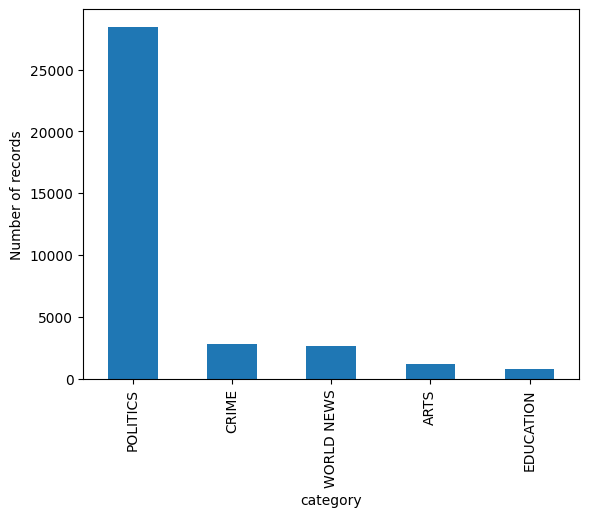

In [16]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('category')
plt.show()

In [17]:
pip install scikit-plot

In [18]:
import spacy
from spacy import displacy
from  spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import en_core_web_sm
import string
import nltk

In [19]:
nlp = spacy.load('en_core_web_sm')

In [20]:
stopwords = list(STOP_WORDS)
print(stopwords[:100])

['side', 'using', 'after', 'please', 'they', 'of', 'very', 'whereby', 'again', 'another', '’ll', 'or', 'does', 'name', 'everything', 'where', 'four', 'serious', 'third', 'eight', 'for', 'due', 'show', "n't", 'beyond', 'yet', 'seems', 'beforehand', 'more', 'something', 'n’t', 'front', 'have', 'across', 'quite', 'therein', 'upon', 'top', 'hers', 'someone', 'through', 'together', 'had', 'down', 'many', '’s', 'first', 'around', 'back', 'however', 'each', 'nothing', 'rather', 'empty', '‘re', 'may', 'while', 'thereupon', 'sometime', 'always', 'eleven', 'seeming', 'herself', 'whose', 'being', 'indeed', 'make', 'whole', 'has', 'she', 'against', 'with', 'thereafter', 'put', 'never', 'whom', 'you', 'go', 'him', 'hereafter', 're', 'both', 'all', 'any', 'could', 'keep', 'them', 'an', 'in', 'mine', 'afterwards', 'unless', 'this', 'nobody', 'amongst', 'least', 'ten', 'also', 'toward', 'although']


In [21]:
# Remove / and - from punctuations for dates
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


**convert to tokens**

In [22]:
# Function to tokenise the text
def tokeniser(sentence):

    # Process the text
    doc = nlp(sentence)
    print(doc)

    # Rule 1
    # Convert tokens to lemma form for all except '-PRON-'
    # Remember (from SpaCy introduction) : Tokens like I, my, me were represented as '-PRON-' by lemma attribute
    tokens = [ token.lemma_.lower().strip() if token.lemma_ != "-PRON-" else token.lower_ for token in doc ]

    # Rule 2
    # Remove stop words and punctuation
    tokens = [ token for token in tokens if token not in stopwords and token not in punctuations ]
    print(tokens)
    return tokens

In [82]:
tfvectorizer = TfidfVectorizer(tokenizer = tokeniser)

In [24]:
df.isna().sum()

category    0
text        0
dtype: int64

In [25]:
df.dropna(inplace=True)

In [26]:
df.shape

(44940, 2)

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
classifier_NB = MultinomialNB()

In [49]:
from sklearn.pipeline import Pipeline

In [50]:
# Create the  pipeline to clean, tokenize, vectorize, and classify using"Count Vectorizor"
# Multiple models can be added to the Pipeline object to be executed in sequence.
model_pipe_NB = Pipeline( [ ('vectorizer', tfvectorizer),
                         ('classifier', classifier_NB) ] )

Fit the model

In [51]:
model_pipe_NB.fit(x_train.values.astype('U'),y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Streaming output truncated to the last 5000 lines.
trump’s 'beachhead' teams host dozens of former lobbyists by ashley balcerzak and niv sultan health and human services secretary tom price has been mired in questions about his investments
['trump', 'beachhead', 'team', 'host', 'dozen', 'lobbyist', 'ashley', 'balcerzak', 'niv', 'sultan', 'health', 'human', 'service', 'secretary', 'tom', 'price', 'mire', 'question', 'investment']
finding art in everyday life 
['find', 'art', 'everyday', 'life']
tom cotton insists trump didn’t say ‘shithole’ but refuses to reveal what word he did use “i stand by every word i said. the difference is, i’m right," the republican senator says.
['tom', 'cotton', 'insist', 'trump', 'shithole', 'refuse', 'reveal', 'word', 'use', 'stand', 'word', 'difference', 'right', 'republican', 'senator']
responsible gun ownership we've fallen into the belief and practice of thinking that our personal points of view are true and have no space for other views. are we so igno

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function tokeniser at 0x7e9a3797c540>)),
                ('classifier', MultinomialNB())])

In [52]:
# Accuracy
print("Train Accuracy: ", model_pipe_NB.score(x_train.values.astype('U'), y_train))

# Accuracy
print("Test Accuracy: ", model_pipe_NB.score(x_test.values.astype('U'), y_test))

Streaming output truncated to the last 5000 lines.
gop policies are shortening american lives a new study suggests that state disparities in life expectancy come down to the conservative-liberal divide.
['gop', 'policy', 'shorten', 'american', 'live', 'new', 'study', 'suggest', 'state', 'disparity', 'life', 'expectancy', 'come', 'conservative', 'liberal', 'divide']
kentucky clerk continues to deny same-sex couples marriage licenses she has argued that issuing marriage licenses to same-sex couples would go against her deeply held religious beliefs that marriage should only be between a man and a woman.
['kentucky', 'clerk', 'continue', 'deny', 'sex', 'couple', 'marriage', 'license', 'argue', 'issue', 'marriage', 'license', 'sex', 'couple', 'deeply', 'hold', 'religious', 'belief', 'marriage', 'man', 'woman']
journalism's challenge in our unending state of emergency this post first appeared at billmoyers.com. it’s old news that donald trump abuses reason, knowledge, decency and dark-skinn

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
classifier_NB = RandomForestClassifier()

In [55]:
from sklearn.pipeline import Pipeline

In [57]:
# Create the  pipeline to clean, tokenize, vectorize, and classify using"Count Vectorizor"
# Multiple models can be added to the Pipeline object to be executed in sequence.
model_pipe_NB = Pipeline( [ ('vectorizer', tfvectorizer),
                         ('classifier', classifier_NB) ] )

In [58]:
model_pipe_NB.fit(x_train.values.astype('U'),y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Streaming output truncated to the last 5000 lines.
trump’s 'beachhead' teams host dozens of former lobbyists by ashley balcerzak and niv sultan health and human services secretary tom price has been mired in questions about his investments
['trump', 'beachhead', 'team', 'host', 'dozen', 'lobbyist', 'ashley', 'balcerzak', 'niv', 'sultan', 'health', 'human', 'service', 'secretary', 'tom', 'price', 'mire', 'question', 'investment']
finding art in everyday life 
['find', 'art', 'everyday', 'life']
tom cotton insists trump didn’t say ‘shithole’ but refuses to reveal what word he did use “i stand by every word i said. the difference is, i’m right," the republican senator says.
['tom', 'cotton', 'insist', 'trump', 'shithole', 'refuse', 'reveal', 'word', 'use', 'stand', 'word', 'difference', 'right', 'republican', 'senator']
responsible gun ownership we've fallen into the belief and practice of thinking that our personal points of view are true and have no space for other views. are we so igno

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function tokeniser at 0x7e9a3797c540>)),
                ('classifier', RandomForestClassifier())])

**PREDICT VALUES**

In [59]:
preds_RF = model_pipe_NB.predict(x_test.values)

Streaming output truncated to the last 5000 lines.
['girl', '10', 'reportedly', 'force', 'travel', 'state', 'abortion', 'young', 'rape', 'victim', 'deny', 'procedure', 'home', 'state', 'ohio', 'abortion', 'ban', 'week']
gop policies are shortening american lives a new study suggests that state disparities in life expectancy come down to the conservative-liberal divide.
['gop', 'policy', 'shorten', 'american', 'live', 'new', 'study', 'suggest', 'state', 'disparity', 'life', 'expectancy', 'come', 'conservative', 'liberal', 'divide']
kentucky clerk continues to deny same-sex couples marriage licenses she has argued that issuing marriage licenses to same-sex couples would go against her deeply held religious beliefs that marriage should only be between a man and a woman.
['kentucky', 'clerk', 'continue', 'deny', 'sex', 'couple', 'marriage', 'license', 'argue', 'issue', 'marriage', 'license', 'sex', 'couple', 'deeply', 'hold', 'religious', 'belief', 'marriage', 'man', 'woman']
journalism's 

In [60]:
print("Train Accuracy: ", model_pipe_NB.score(x_train.values.astype('U'), y_train))

# Accuracy
print("Test Accuracy: ", model_pipe_NB.score(x_test.values.astype('U'), y_test))

Streaming output truncated to the last 5000 lines.
gop policies are shortening american lives a new study suggests that state disparities in life expectancy come down to the conservative-liberal divide.
['gop', 'policy', 'shorten', 'american', 'live', 'new', 'study', 'suggest', 'state', 'disparity', 'life', 'expectancy', 'come', 'conservative', 'liberal', 'divide']
kentucky clerk continues to deny same-sex couples marriage licenses she has argued that issuing marriage licenses to same-sex couples would go against her deeply held religious beliefs that marriage should only be between a man and a woman.
['kentucky', 'clerk', 'continue', 'deny', 'sex', 'couple', 'marriage', 'license', 'argue', 'issue', 'marriage', 'license', 'sex', 'couple', 'deeply', 'hold', 'religious', 'belief', 'marriage', 'man', 'woman']
journalism's challenge in our unending state of emergency this post first appeared at billmoyers.com. it’s old news that donald trump abuses reason, knowledge, decency and dark-skinn

**CONFUSION MATRIX**

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [62]:
conf_matrix = confusion_matrix(y_test,preds_RF)

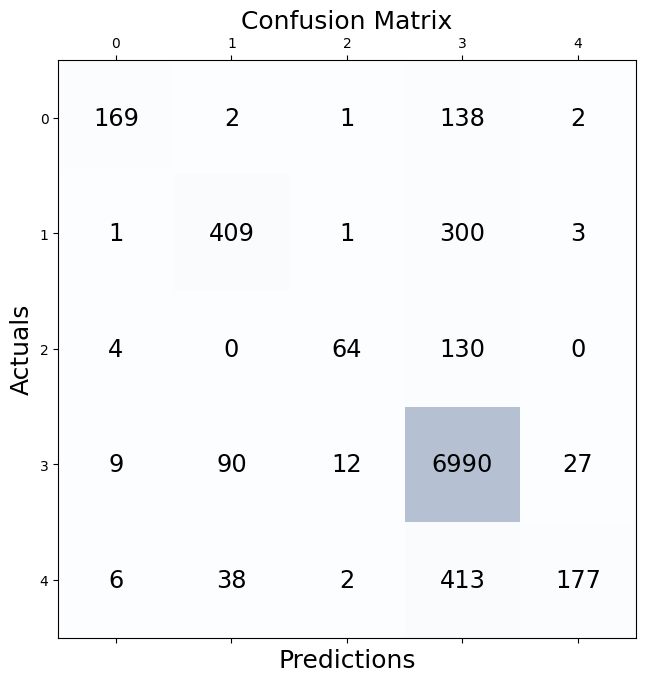

In [63]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [64]:
output = pd.DataFrame({'Id': x_test.index,
                       'Category': preds_RF})
output.to_csv('submission.csv', index=False)

**UNDERSAMPLING**

In [165]:
# class count
politics_count, crime_count,world_news_count,arts_count,education_count = df['category'].value_counts()


# Separate class
arts =df[df['category'] =='ARTS']
crime =df[df['category'] =='CRIME']
education= df[df['category'] =='EDUCATION']
politics = df[df['category'] =='POLITICS']
world_news = df[df['category']=='WORLD NEWS']# print the shape of the class
print('class arts:', arts.shape)
print('class crime:', crime.shape)
print('class education:', education.shape)
print('class politics:', politics.shape)
print('class world_news:', world_news.shape)

class arts: (1509, 2)
class crime: (3562, 2)
class education: (1014, 2)
class politics: (35602, 2)
class world_news: (3299, 2)


In [166]:
arts.head(2)

category                                               text
19959     ARTS  An Alert, Well-Hydrated Artist in No Acute Dis...
20683     ARTS  Stage Door: Ute Lemper's Songs From The Broken...

In [167]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [168]:
X = df['text']
y = df['category']
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)
le = LabelEncoder()
# label encode the target variable
y = le.fit_transform(y)
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'ARTS': np.int64(0), 'CRIME': np.int64(1), 'EDUCATION': np.int64(2), 'POLITICS': np.int64(3), 'WORLD NEWS': np.int64(4)}


Class=4, n=13050 (13.030%)
Class=3, n=35602 (35.548%)
Class=2, n=17000 (16.974%)
Class=1, n=19000 (18.971%)
Class=0, n=15500 (15.476%)


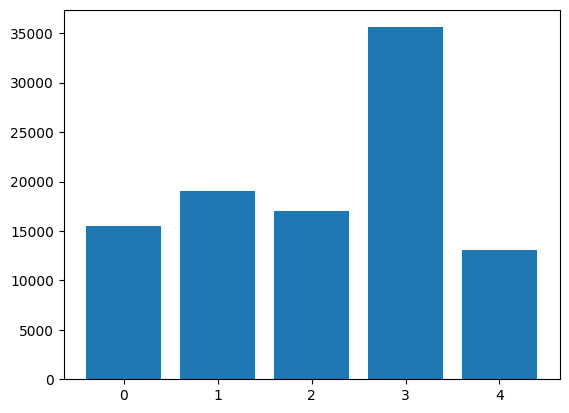

In [169]:
# transform the dataset
strategy = {1:19000, 4:13050, 0:15500, 2:17000}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X_vec, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Exploring **Undersampling politics category**

In [107]:
import pandas as pd
path  = '/content/drive/MyDrive/Colab Notebooks/news40k.csv'
udf = pd.read_csv(path)

In [108]:
import numpy as np

# Check class distribution
print(udf['category'].value_counts())

#3562 is next highest data count

# For each class, randomly sample 'min_count' rows
balanced_df = udf.groupby('category').apply(lambda x: x.sample(3562, random_state=42)if x.name == 'POLITICS' else x
).reset_index(drop=True)

# Check new distribution
print(balanced_df['category'].value_counts())

category
POLITICS      35602
CRIME          3562
WORLD NEWS     3299
ARTS           1509
EDUCATION      1014
Name: count, dtype: int64
category
CRIME         3562
POLITICS      3562
WORLD NEWS    3299
ARTS          1509
EDUCATION     1014
Name: count, dtype: int64


<ipython-input-108-85a0d7b01f8c>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = udf.groupby('category').apply(lambda x: x.sample(3562, random_state=42)if x.name == 'POLITICS' else x


In [109]:
import nltk
import spacy
from spacy import displacy
from  spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import en_core_web_sm
import string
import nltk
nltk.download('stopwords');
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [110]:
#converting text to lowercase
df['text'] = df['text'].str.lower()

In [112]:
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
nlp = spacy.load('en_core_web_sm')
#converting to tokens

def identify_tokens(row):
    text = nlp(row)
    # taken only words (not punctuation)
    token_words = [w for w in text if w.is_alpha]  # Using is_alpha (spaCy)
    # taken only words (not stopwords)
    token_words = [w.text for w in token_words if w.text.lower() not in stop_words]
    return token_words
df['text'] = df['text'].astype(str)
df['text'] = df['text'].apply(identify_tokens)

**Result from undersampling**

In [113]:
# Spliting dataframe into x and y
y = df['category']
X = df['text']

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], train_size=0.2, shuffle=True, random_state=1)

In [84]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [85]:
 # Fit a tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvectorizer = TfidfVectorizer(tokenizer = identify_tokens)

In [87]:

from sklearn.pipeline import Pipeline

In [88]:
#splitting model
X_train, X_test, y_train, y_test = train_test_split( df['text'], df['category'],
                                                    test_size = 0.2, random_state = 678)
from sklearn.naive_bayes import MultinomialNB
classifier_NB = MultinomialNB()

In [89]:
model_pipe_NB = Pipeline( [ ('vectorizer', tfvectorizer),
                         ('classifier', classifier_NB) ] )

In [91]:
X_train = X_train.apply(lambda x: ' '.join(x))
model_pipe_NB.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function identify_tokens at 0x7ba5606a2160>)),
                ('classifier', MultinomialNB())])

In [ ]:
'''import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
for sentence in df["text"]:
  doc = nlp(sentence)
  print([(X.text, X.label_) for X in doc.ents])
'''

[('house', 'ORG')]
[('three years', 'DATE')]
[]
[('etgar keret examines life', 'PERSON'), ('israel', 'GPE')]
[]
[('a day', 'DATE')]
[('massart', 'ORG'), ('boston', 'GPE')]
[('hungarian', 'NORP')]
[]
[('trisha williams', 'PERSON')]
[("new york's", 'GPE')]
[]
[('2.0', 'CARDINAL')]
[]
[]
[('london', 'GPE')]
[]
[]
[('gloria', 'PERSON')]
[('world', 'ORG')]
[("anish kapoor's", 'PERSON')]
[]
[]
[('this summer', 'DATE')]
[]
[('art basel', 'PERSON'), ('basel 2015', 'DATE')]
[("yoko ono's", 'PERSON')]
[('max ginsburg', 'PERSON')]
[('5', 'CARDINAL'), ('2015', 'DATE')]
[("yiddish-wong-ish --it's", 'GPE')]
[("b'way", 'CARDINAL'), ('35', 'CARDINAL')]
[]
[("the royal shakespeare company's", 'ORG'), ('venice', 'GPE')]
[]
[('today', 'DATE')]
[('bosque', 'GPE')]
[]
[]
[]
[('america', 'GPE')]
[('summer', 'DATE'), ('bingo', 'PERSON'), ('summer', 'DATE')]
[('david ligare', 'PERSON'), ('the crocker art museum', 'ORG'), ('sacramento', 'GPE')]
[]
[]
[]
[]
[]
[('san francisco', 'GPE')]
[('the fourth of july', 

In [114]:
df.to_csv('news_classification_model_final.csv', encoding='utf-8', index=False)

In [115]:
shutil.copy('news_classification_model_final.csv','/content/drive/MyDrive/Colab Notebooks/news_final.csv')

'/content/drive/MyDrive/Colab Notebooks/news_final.csv'

In [171]:
#new column
df["lable"] = ""

In [117]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 2.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [172]:
import spacy
import os
## call model
ner = spacy.load('en_core_web_lg')
## tag text
txt = " ".join(df["text"].iloc[0])
doc = ner(txt)
## display result
spacy.displacy.render(doc, style="ent")

In [173]:
df.columns
df.head(5)

category                                               text lable
0  WORLD NEWS  Puerto Ricans Desperate For Water After Hurric...      
1  WORLD NEWS  Biden At UN To Call Russian War An Affront To ...      
2  WORLD NEWS  World Cup Captains Want To Wear Rainbow Armban...      
3  WORLD NEWS  Man Sets Himself On Fire In Apparent Protest O...      
4  WORLD NEWS  Fiona Threatens To Become Category 4 Storm Hea...

In [ ]:
## tag text and exctract tags into a list
df["label"] = df["text"].apply(lambda x: [(tag.text, tag.label_)
                                for tag in ner(" ".join(x)).ents])

In [ ]:
## tag text and exctract tags into a list
dtf["tags"] = dtf["text"].apply(lambda x: [(tag.text, tag.label_)
                                for tag in ner(x).ents] )

**process words**

In [ ]:
import spacy
from spacy import displacy
from  spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import en_core_web_sm
import string
import nltk

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
stopwords = list(STOP_WORDS)
print(stopwords[:])
punctuations = string.punctuation
print(punctuations)

In [ ]:
# Function to tokenise the text
def tokeniser(sentence):

    # Process the text
    doc = nlp(sentence)

    # Rule 1
    # Convert tokens to lemma form for all except '-PRON-'
    # Remember (from SpaCy introduction) : Tokens like I, my, me were represented as '-PRON-' by lemma attribute
    tokens = [ token.lemma_.lower().strip() if token.lemma_ != "-PRON-" else token.lower_ for token in doc ]

    # Rule 2
    # Remove stop words and punctuation
    tokens = [ token for token in tokens if token not in stopwords and token not in punctuations ]

    return tokens

In [ ]:
tfvectorizer = TfidfVectorizer(tokenizer = tokeniser)

In [ ]:
df.shape
df.isna().sum()

In [ ]:
print(df.isnull().sum())  # For the entire dataframe

# Check specific columns
print(df['category'].isnull().sum())  # Check target variable
print(df['text'].isnull().sum())      # Check feature variable

In [ ]:
print(df[df['text'].isnull() | (df['text'] == '')].shape)

In [ ]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split( df['text'], df['category'],
                                                    test_size = 0.2, random_state = 100)

In [144]:
print(X_train.isnull().sum())  # Check if there are NaN values in the features
print(y_train.isnull().sum())  # Check if there are NaN values in the labels

0
0


In [145]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [146]:
classifier_NB = MultinomialNB()

In [147]:
from sklearn.pipeline import Pipeline

In [148]:
model_pipe_NB = Pipeline( [ ('vectorizer', tfvectorizer),
                         ('classifier', classifier_NB) ] )

In [149]:
print(type(y_train))  # This will tell you the type of y_train
print(y_train.shape)  # This will tell you the shape of y_train (if it's a pandas Series or numpy array)

<class 'pandas.core.series.Series'>
(35952,)


In [151]:
print(y_train.head())  # Check how many NaN values are in y_train

27028    POLITICS
11027    POLITICS
22052    POLITICS
10208    POLITICS
24750       CRIME
Name: category, dtype: object


In [153]:
X_train = X_train.apply(lambda x: ' '.join(x))
model_pipe_NB.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function tokeniser at 0x7ba4e4300fe0>)),
                ('classifier', MultinomialNB())])

In [154]:
# Join the tokens back into a string for X_test
X_test = X_test.apply(lambda x: ' '.join(x))

# Predict on test data
preds = model_pipe_NB.predict(X_test)

In [155]:
# Accuracy
print("Train Accuracy: ", model_pipe_NB.score(X_train, y_train))

# Accuracy
print("Test Accuracy: ", model_pipe_NB.score(X_test, y_test))

Train Accuracy:  0.7900812194036493
Test Accuracy:  0.7969514908767246


In [156]:
import pickle

In [157]:
filename = 'NB_model_5cat_data.sav'
pickle.dump(model_pipe_NB, open(filename, 'wb'))

In [158]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

Predict on test data

In [159]:
preds = model_pipe_NB.predict(X_test)

In [160]:
preds[:10]

array(['POLITICS', 'POLITICS', 'POLITICS', 'POLITICS', 'POLITICS',
       'POLITICS', 'POLITICS', 'POLITICS', 'POLITICS', 'POLITICS'],
      dtype='<U10')

In [161]:
X_test[:10]

25202    nan
21880    nan
13788    nan
32071    nan
5650     nan
32297    nan
6928     nan
40579    nan
1005     nan
2834     nan
Name: text, dtype: object

In [162]:
y_test[:10]

25202    POLITICS
21880    POLITICS
13788    POLITICS
32071    POLITICS
5650     POLITICS
32297    POLITICS
6928     POLITICS
40579    POLITICS
1005     POLITICS
2834     POLITICS
Name: category, dtype: object

Compute accuracy

In [163]:
# Accuracy
print("Train Accuracy: ", model_pipe_NB.score(X_train, y_train))

# Accuracy
print("Test Accuracy: ", model_pipe_NB.score(X_test, y_test))

Train Accuracy:  0.7900812194036493
Test Accuracy:  0.7969514908767246


https://www.kaggle.com/jeffd23/10-classifier-showdown-in-scikit-learn